In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Aura Rachmawaty
- **Email:** aura.rachmawaty03@gmail.com
- **ID Dicoding:** MC295D5X1618

## Menentukan Pertanyaan Bisnis

- Bagaimana strategi optimal untuk meningkatkan jumlah penyewaan sepeda selama musim sepi?
- Kapan waktu terbaik untuk menjalankan promosi atau diskon guna meningkatkan penyewaan sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
pip install streamlit

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

memuat table day

In [3]:
day_df = pd.read_csv("dashboard/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


memuat table hour

In [4]:
hour_df = pd.read_csv("dashboard/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Gathering memastikan bahwa dataset memiliki cakupan yang baik dengan dua tingkat granularitas (harian & per jam).

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
Assessing memastikan bahwa dataset bersih dari duplikasi dan missing values, tetapi ada beberapa kolom yang perlu transformasi sebelum analisis lebih lanjut.

### Cleaning Data

**Insight:**
karena tidak ada missing value dan duplikasi maka tidak diperlukan cleaning data.

## Exploratory Data Analysis (EDA)

### Explore ...

Eksplorasi data **day_df**

In [9]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [10]:
print("\nStatistik Deskriptif Day:")
day_desc = day_df.describe()
print(day_desc)


Statistik Deskriptif Day:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   


In [11]:
print("\nJumlah Nilai Unik Season:", day_df['season'].nunique())
print("Jumlah Nilai Unik Weather:", day_df['weathersit'].nunique())


Jumlah Nilai Unik Season: 4
Jumlah Nilai Unik Weather: 3


In [12]:
print("\nDistribusi Penyewaan Sepeda Berdasarkan Musim:")
print(day_df.groupby('season')['cnt'].describe())


Distribusi Penyewaan Sepeda Berdasarkan Musim:
        count         mean          std     min     25%     50%      75%  \
season                                                                     
1       181.0  2604.132597  1399.942119   431.0  1538.0  2209.0  3456.00   
2       184.0  4992.331522  1695.977235   795.0  4003.0  4941.5  6377.00   
3       188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5  6929.25   
4       178.0  4728.162921  1699.615261    22.0  3615.5  4634.5  5624.50   

           max  
season          
1       7836.0  
2       8362.0  
3       8714.0  
4       8555.0  


In [13]:
print("\nDistribusi Penyewaan Sepeda Berdasarkan Hari Libur dan Hari Kerja:")
print(day_df.groupby(['holiday', 'workingday'])['cnt'].describe())


Distribusi Penyewaan Sepeda Berdasarkan Hari Libur dan Hari Kerja:
                    count         mean          std     min      25%     50%  \
holiday workingday                                                             
0       0           210.0  4389.685714  2042.527458   605.0  2765.25  4467.5   
        1           500.0  4584.820000  1878.415583    22.0  3344.25  4582.0   
1       0            21.0  3735.000000  2103.350660  1000.0  1951.00  3351.0   

                       75%     max  
holiday workingday                  
0       0           5871.5  8714.0  
        1           5987.5  8362.0  
1       0           6034.0  7403.0  


Eksplorasi data **hour_df**

In [14]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [15]:
print("\nStatistik Deskriptif Hour:")
hour_desc = hour_df.describe()
print(hour_desc)


Statistik Deskriptif Hour:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.

In [16]:
print("\nJumlah Nilai Unik Hour:", hour_df['hr'].nunique())


Jumlah Nilai Unik Hour: 24


In [17]:
print("\nDistribusi Penyewaan Sepeda Berdasarkan Jam:")
print(hour_df.groupby('hr')['cnt'].describe())


Distribusi Penyewaan Sepeda Berdasarkan Jam:
    count        mean         std   min     25%    50%     75%    max
hr                                                                   
0   726.0   53.898072   42.307910   2.0   25.00   40.0   69.00  283.0
1   724.0   33.375691   33.538727   1.0   11.00   20.0   42.25  168.0
2   715.0   22.869930   26.578642   1.0    5.00   11.0   28.50  132.0
3   697.0   11.727403   13.239190   1.0    3.00    6.0   15.00   79.0
4   697.0    6.352941    4.143818   1.0    3.00    6.0    8.00   28.0
5   717.0   19.889819   13.200765   1.0    8.00   19.0   29.00   66.0
6   725.0   76.044138   55.084348   1.0   23.00   76.0  117.00  213.0
7   727.0  212.064649  161.441936   1.0   55.50  208.0  332.00  596.0
8   727.0  359.011004  235.189285   5.0  131.50  385.0  559.50  839.0
9   727.0  219.309491   93.703458  14.0  155.00  216.0  293.00  426.0
10  727.0  173.668501  102.205413   8.0  106.00  147.0  218.00  539.0
11  727.0  208.143054  127.495536  10.0  123

In [18]:
print("\nDistribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca:")
print(hour_df.groupby('weathersit')['cnt'].describe())


Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca:
              count        mean         std   min   25%    50%    75%    max
weathersit                                                                  
1           11413.0  204.869272  189.487773   1.0  46.0  159.0  304.0  977.0
2            4544.0  175.165493  165.431589   1.0  40.0  133.0  257.0  957.0
3            1419.0  111.579281  133.781045   1.0  21.0   63.0  152.5  891.0
4               3.0   74.333333   77.925178  23.0  29.5   36.0  100.0  164.0


**Insight:**
- Data bersih, tidak memiliki duplikasi, dan tidak memiliki nilai yang hilang.
- Data harian (day_df) memberikan gambaran tren jangka panjang, sementara data per jam (hour_df) membantu memahami pola waktu spesifik dalam sehari.
- Cuaca dan musim memiliki pengaruh yang jelas terhadap jumlah penyewaan sepeda, terutama temperatur dan kondisi cuaca.
- Pola waktu sangat signifikan, terutama pada dataset hour_df, yang menunjukkan lonjakan peminjaman sepeda pada jam sibuk (pagi dan sore).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana strategi optimal untuk meningkatkan jumlah penyewaan sepeda selama musim sepi?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16612\1819882948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=day_df, palette='Set2')


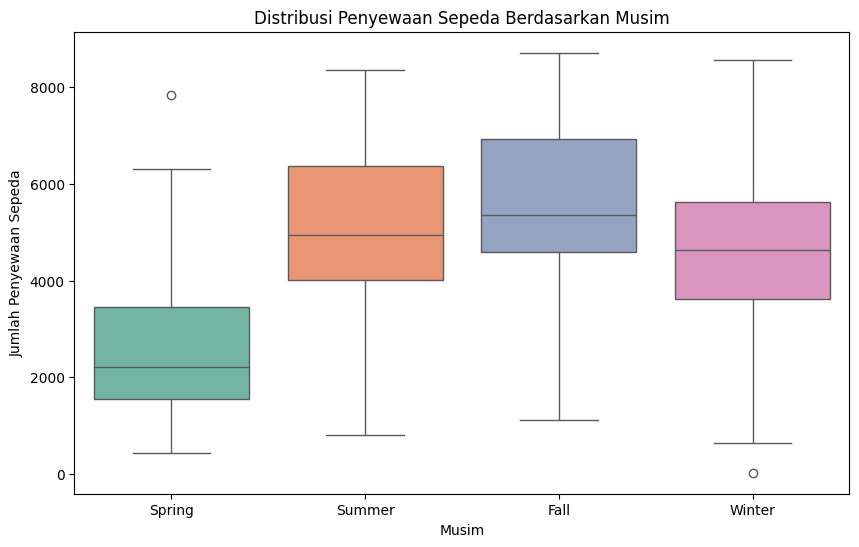

In [19]:
# Visualisasi 1: Distribusi penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df, palette='Set2')
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16612\1081575414.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='mnth', y='cnt', data=day_df, ci=None, marker='o', color='b')


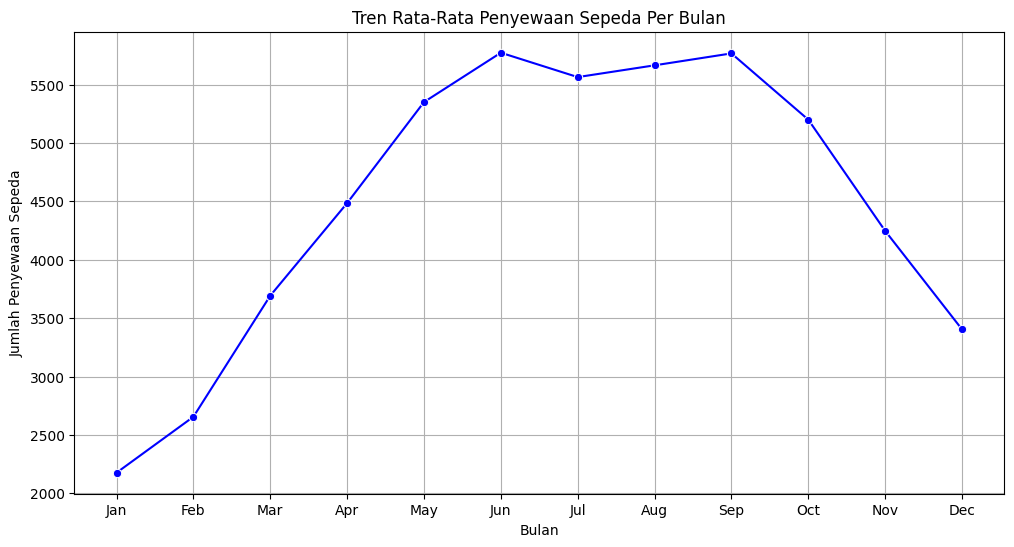

In [20]:
# Visualisasi 2: Tren penyewaan sepeda berdasarkan bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=day_df, ci=None, marker='o', color='b')
plt.title("Tren Rata-Rata Penyewaan Sepeda Per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()

### Pertanyaan 2:

Kapan waktu terbaik untuk menjalankan promosi atau diskon guna meningkatkan penyewaan sepeda?

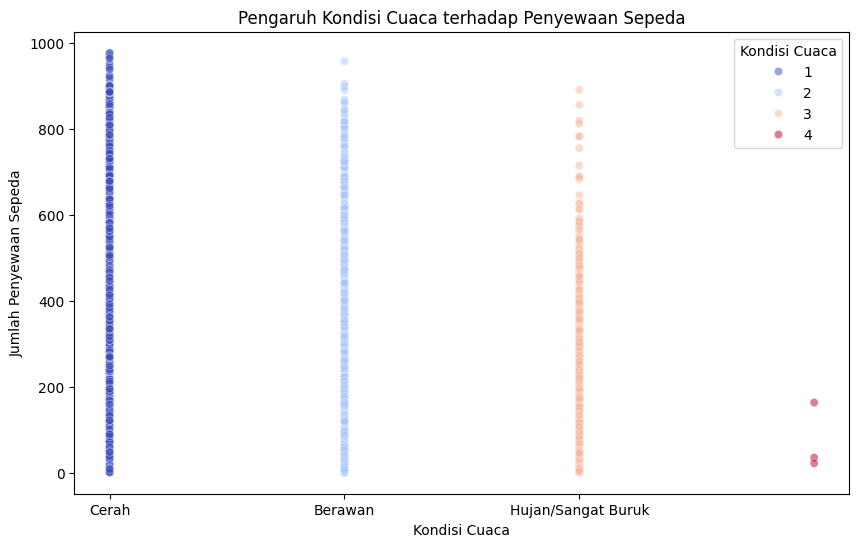

In [21]:
# Visualisasi 3: Scatter plot penyewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weathersit', y='cnt', data=hour_df, alpha=0.5, hue='weathersit', palette='coolwarm')
plt.title("Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[1, 2, 3], labels=["Cerah", "Berawan", "Hujan/Sangat Buruk"])
plt.legend(title="Kondisi Cuaca")
plt.show()

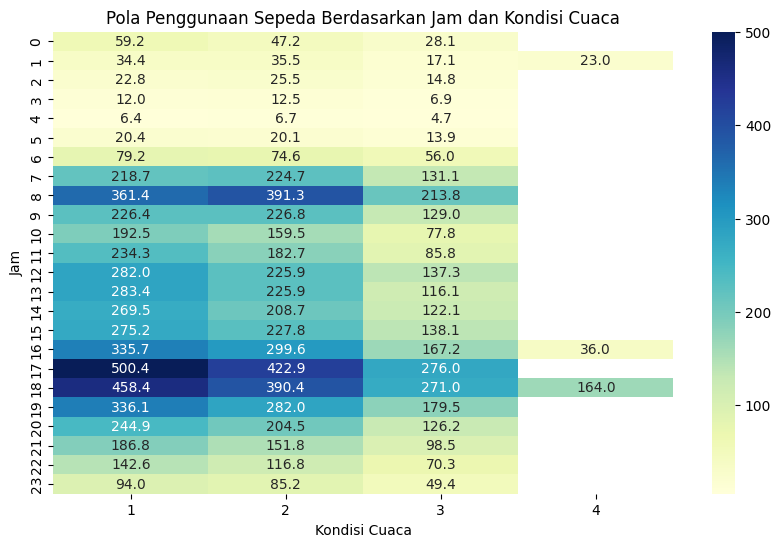

In [22]:
# Visualisasi 4: Heatmap pola penggunaan sepeda berdasarkan jam dan kondisi cuaca
hour_pivot = hour_df.pivot_table(values='cnt', index='hr', columns='weathersit', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(hour_pivot, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title("Pola Penggunaan Sepeda Berdasarkan Jam dan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jam")
plt.show()

**Insight:**
- Musim dan cuaca sangat mempengaruhi jumlah penyewaan sepeda. Perusahaan penyewaan sepeda dapat memanfaatkan pola musiman ini untuk strategi pemasaran atau penyesuaian harga.
- Jam sibuk pagi dan sore adalah waktu utama penyewaan sepeda. Ini bisa dimanfaatkan dengan menempatkan lebih banyak sepeda di lokasi strategis selama waktu-waktu tersebut.
- Cuaca buruk mengurangi permintaan sepeda secara signifikan. Alternatif seperti promosi diskon atau layanan tambahan (misalnya penyewaan jas hujan) bisa dipertimbangkan untuk meningkatkan penggunaan pada hari-hari hujan.


## dashboard

In [23]:
!conda activate main-ds
!pip install streamlit babel

'conda' is not recognized as an internal or external command,
operable program or batch file.


2025-03-16 15:49:22.698 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 15:49:23.112 
  command:

    streamlit run c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-16 15:49:23.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 15:49:23.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 15:49:23.121 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 15:49:23.122 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 15:49:23.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 15:49

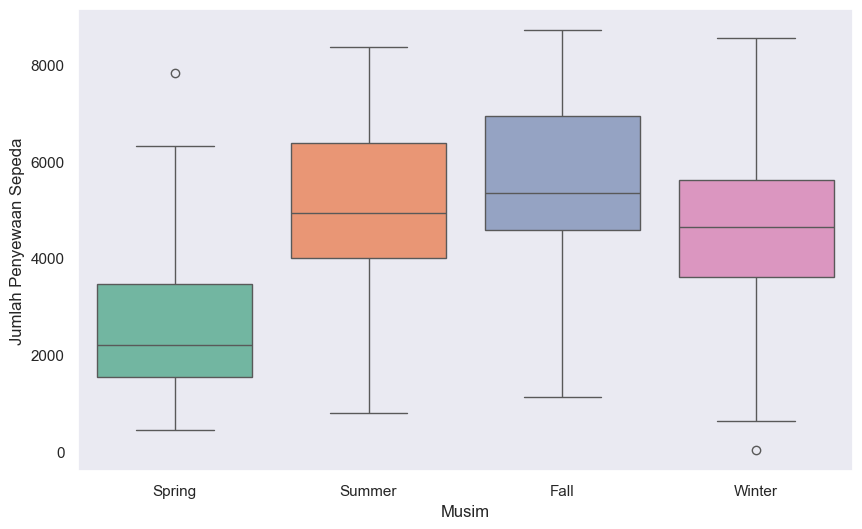

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

sns.set(style='dark')

# Load dataset
day_df =pd.read_csv("dashboard/day.csv")
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

hour_df = pd.read_csv("dashboard/hour.csv")
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Sidebar controls
st.sidebar.title("Bike Sharing Analysis")
start_date = st.sidebar.date_input("Mulai Tanggal", day_df['dteday'].min())
end_date = st.sidebar.date_input("Akhir Tanggal", day_df['dteday'].max())

season_filter = st.sidebar.multiselect(
    "Pilih Musim:", [1, 2, 3, 4], default=[1, 2, 3, 4],
    format_func=lambda x: ["Spring", "Summer", "Fall", "Winter"][x-1]
)

weather_filter = st.sidebar.multiselect(
    "Pilih Kondisi Cuaca:", [1, 2, 3], default=[1, 2, 3],
    format_func=lambda x: ["Cerah", "Berawan", "Hujan/Sangat Buruk"][x-1]
)

hour_filter = st.sidebar.slider("Pilih Rentang Jam:", 0, 23, (0, 23))

option = st.sidebar.selectbox("Pilih Analisis:", [
    "Distribusi Penyewaan Berdasarkan Musim",
    "Tren Penyewaan Per Bulan",
    "Pengaruh Cuaca terhadap Penyewaan",
    "Pola Penyewaan Sepeda Berdasarkan Jam"
])

# Filter dataset
day_filtered = day_df[(day_df['dteday'] >= pd.Timestamp(start_date)) &
                       (day_df['dteday'] <= pd.Timestamp(end_date)) &
                       (day_df['season'].isin(season_filter))]

hour_filtered = hour_df[(hour_df['dteday'] >= pd.Timestamp(start_date)) &
                         (hour_df['dteday'] <= pd.Timestamp(end_date)) &
                         (hour_df['weathersit'].isin(weather_filter)) &
                         (hour_df['hr'].between(hour_filter[0], hour_filter[1]))]

# Visualizations
if option == "Distribusi Penyewaan Berdasarkan Musim":
    st.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(x='season', y='cnt', data=day_filtered, palette='Set2', ax=ax)
    ax.set_xlabel("Musim")
    ax.set_ylabel("Jumlah Penyewaan Sepeda")
    ax.set_xticklabels(["Spring", "Summer", "Fall", "Winter"])
    st.pyplot(fig)

elif option == "Tren Penyewaan Per Bulan":
    st.title("Tren Rata-Rata Penyewaan Sepeda Per Bulan")
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(x='mnth', y='cnt', data=day_filtered, ci=None, marker='o', color='b', ax=ax)
    ax.set_xlabel("Bulan")
    ax.set_ylabel("Jumlah Penyewaan Sepeda")
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    ax.grid()
    st.pyplot(fig)

elif option == "Pengaruh Cuaca terhadap Penyewaan":
    st.title("Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x='weathersit', y='cnt', data=hour_filtered, alpha=0.5, hue='weathersit', palette='coolwarm', ax=ax)
    ax.set_xlabel("Kondisi Cuaca")
    ax.set_ylabel("Jumlah Penyewaan Sepeda")
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(["Cerah", "Berawan", "Hujan/Sangat Buruk"])
    ax.legend(title="Kondisi Cuaca")
    st.pyplot(fig)

elif option == "Pola Penyewaan Sepeda Berdasarkan Jam":
    st.title("Pola Penggunaan Sepeda Berdasarkan Jam dan Kondisi Cuaca")
    hour_pivot = hour_filtered.pivot_table(values='cnt', index='hr', columns='weathersit', aggfunc='mean')
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(hour_pivot, cmap='YlGnBu', annot=True, fmt='.1f', ax=ax)
    ax.set_xlabel("Kondisi Cuaca")
    ax.set_ylabel("Jam")
    st.pyplot(fig)

In [32]:
!streamlit run app.py & npx localtunnel --port 8501

^C


## Conclusion

- Conclution pertanyaan 1

**Jawab**

Berdasarkan analisis pola penggunaan sepeda, terlihat bahwa jumlah penyewaan cenderung lebih tinggi pada musim panas dan gugur dibandingkan dengan musim dingin dan semi. Musim gugur mencatat jumlah penyewaan tertinggi dengan distribusi yang lebih luas, menunjukkan bahwa cuaca pada musim ini lebih kondusif untuk bersepeda. Tren bulanan juga menunjukkan peningkatan penyewaan dari awal tahun hingga pertengahan tahun, dengan puncaknya terjadi pada musim panas sebelum menurun setelah bulan September. Dari sudut pandang bisnis, operator bike-sharing dapat mengantisipasi lonjakan permintaan dengan menambah jumlah sepeda yang tersedia serta meningkatkan layanan perawatan menjelang musim panas dan gugur. Selain itu, strategi promosi seperti diskon khusus di musim dingin dapat diterapkan untuk menjaga tingkat penggunaan sepeda tetap stabil sepanjang tahun.


- Conclution pertanyaan 2

**Jawab**

Analisis mengenai pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda menunjukkan bahwa penggunaan sepeda lebih tinggi pada hari-hari cerah dibandingkan dengan saat cuaca berawan atau hujan. Pola penggunaan harian mengindikasikan bahwa jumlah penyewaan mencapai puncaknya di pagi hari (jam 7-9) dan sore hari (jam 17-19), yang bertepatan dengan jam sibuk perjalanan kerja. Namun, ketika kondisi cuaca memburuk, jumlah penyewaan mengalami penurunan signifikan, terutama di luar jam sibuk. Dari sudut pandang bisnis, perusahaan dapat meningkatkan daya tarik layanan pada hari berawan atau hujan dengan menyediakan fasilitas tambahan seperti jas hujan, stasiun parkir tertutup, atau menawarkan insentif seperti diskon harga untuk perjalanan dalam kondisi cuaca yang kurang ideal. Strategi ini dapat membantu mempertahankan jumlah pelanggan serta memastikan penggunaan layanan yang lebih konsisten sepanjang tahun. 🚲